In [1]:
import pandas as pd
import numpy as np

In [2]:
from src.utils.pip_pattern_miner import PIPPatternMiner

/liubinxu/liubinxu/finance/learning/src/utils/data_utils.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
data_file = "/liubinxu/liubinxu/finance/learning/data/000852.qfq.kdj.parquet"

In [4]:
data = pd.read_parquet(data_file)

In [5]:
def add_kdj_type(data):
    data["k_last"] = data["K"].shift(1)
    data["K_choose"] = "none"
    data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20)] = "type1"
    data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
    data["K_choose"][(data["k_last"] < 50) & (data["K"] >= 50)]= "type2"

    data_choose = data[(data["K_choose"] !="none")]
    data_choose["K_choose_last"] = data_choose["K_choose"].shift()
    data_choose["K_choose"][(data_choose["K_choose"] == "type2") & (data_choose["K_choose_last"] == "type2")] = "type3"
    return data

In [6]:
data = add_kdj_type(data)
# data["K_pre"] = data["K"].shift()
data["signal"] = False
data["signal"][data["K_choose"]!="none"] = True

In [51]:
data[data["K_choose"]!="none"]["K_choose"]

index
2021-08-19 14:30:00    typen
2021-08-20 10:00:00    type2
2021-08-20 14:05:00    type1
2021-08-20 14:20:00    type2
2021-08-23 14:25:00    typen
                       ...  
2023-11-30 14:15:00    type1
2023-11-30 14:35:00    type2
2023-12-01 10:25:00    typen
2023-12-01 13:30:00    type2
2023-12-01 14:30:00    typen
Name: K_choose, Length: 1379, dtype: object

In [56]:
data["signal"][30:60]

index
2021-08-19 13:35:00    False
2021-08-19 13:40:00    False
2021-08-19 13:45:00    False
2021-08-19 13:50:00    False
2021-08-19 13:55:00    False
2021-08-19 14:00:00    False
2021-08-19 14:05:00    False
2021-08-19 14:10:00    False
2021-08-19 14:15:00    False
2021-08-19 14:20:00    False
2021-08-19 14:25:00    False
2021-08-19 14:30:00     True
2021-08-19 14:35:00    False
2021-08-19 14:40:00    False
2021-08-19 14:45:00    False
2021-08-19 14:50:00    False
2021-08-19 14:55:00    False
2021-08-19 15:00:00    False
2021-08-20 09:35:00    False
2021-08-20 09:40:00    False
2021-08-20 09:45:00    False
2021-08-20 09:50:00    False
2021-08-20 09:55:00    False
2021-08-20 10:00:00     True
2021-08-20 10:05:00    False
2021-08-20 10:10:00    False
2021-08-20 10:15:00    False
2021-08-20 10:20:00    False
2021-08-20 10:25:00    False
2021-08-20 10:30:00    False
Name: signal, dtype: bool

In [ ]:
data[data["signal"] == True]

In [ ]:
(data["target_close2"] - data["close"]) /data["close"]

In [7]:
data = data[:5000]

In [7]:
# data = pd.read_parquet(data_file)
# data['date'] = data['date'].astype('datetime64[s]')
# data = data.set_index('date')
# data = np.log(data)

# plt.style.use('dark_background')

# data = data[data.index < '01-01-2020']
arr = data['close'].to_numpy()
amount = data["amount_normalize20_rolling_480_mean"]
signal_choose = data["signal"].to_numpy()
retuen = data["target_close2"]
pip_miner = PIPPatternMiner(n_pips=7, lookback=960, hold_period=12, signal_choose=signal_choose)
pip_miner.train_multi([arr], vol=[amount], n_reps=-1)

In [9]:
pip_miner._unique_pip_patterns

[[0.48992932759106533,
  -1.8595806898897813,
  0.879469004712757,
  0.9625261005328869,
  -1.162672826484748,
  0.4223703189574947,
  0.2679587645803541,
  -0.4353705311943181,
  -1.173744976766367,
  -1.3019285780960137,
  -0.22344228582249578,
  0.6038970996582668,
  1.0191259813114455,
  1.5114632909094832],
 [-1.304414393440262,
  1.082918083553666,
  1.1782168656980052,
  -1.2602125973046208,
  0.5584481675022913,
  -0.7619444027722375,
  0.5069882767631119,
  -1.3020876426677346,
  -1.4424186717210834,
  -0.4520480859580907,
  0.3076950815661691,
  0.6889984636255468,
  0.97631886431681,
  1.223541990838383],
 [-0.6424561488176714,
  1.1403311624944412,
  -1.567867540292942,
  0.45199598202338326,
  -0.9500667646602412,
  0.28787249830873035,
  1.2801908109443807,
  -2.0202083091475758,
  -0.8255556072681867,
  -0.02080704984276099,
  0.3830838435148576,
  0.7405244015340869,
  0.7649584770461266,
  0.9780042441634521],
 [-0.5855057671302424,
  0.9639222037945464,
  -1.263964897

In [10]:
len(pip_miner._unique_pip_patterns)

624

In [11]:
pip_miner._unique_pip_indices

[2353,
 2470,
 2582,
 2641,
 2737,
 2787,
 2930,
 3039,
 3045,
 3054,
 3072,
 3095,
 3104,
 3118,
 3148,
 3198,
 3239,
 3249,
 3265,
 3312,
 3320,
 3357,
 3377,
 3429,
 3454,
 3483,
 3506,
 3543,
 3667,
 3679,
 3698,
 3708,
 3744,
 3841,
 3867,
 3873,
 3889,
 3963,
 4055,
 4083,
 4126,
 4153,
 4253,
 4274,
 4295,
 4341,
 4357,
 4370,
 4404,
 4431,
 4457,
 4490,
 4519,
 4540,
 4657,
 4676,
 4706,
 4710,
 4792,
 4811,
 4889,
 4919,
 4946,
 5004,
 5028,
 5058,
 5169,
 5202,
 5232,
 5307,
 5312,
 5363,
 5412,
 5443,
 5473,
 5519,
 5526,
 5570,
 5723,
 5858,
 5869,
 5899,
 5904,
 5962,
 6132,
 6191,
 6240,
 6266,
 6270,
 6326,
 6330,
 6362,
 6410,
 6433,
 6489,
 6541,
 6554,
 6605,
 6690,
 6831,
 6868,
 6957,
 7113,
 7173,
 7236,
 7261,
 7268,
 7295,
 7320,
 7363,
 7370,
 7393,
 7443,
 7449,
 7468,
 7482,
 7514,
 7519,
 7546,
 7558,
 7610,
 7630,
 7683,
 7707,
 7735,
 7796,
 7819,
 7834,
 7838,
 7875,
 7889,
 7923,
 7962,
 8051,
 8066,
 8074,
 8092,
 8241,
 8258,
 8266,
 8382,
 8513,
 8640,

In [ ]:
len(pip_miner._cluster_signals[16])

In [ ]:
pip_miner._selected_long

In [60]:
pip_miner._cluster_centers[16]

[-0.7866641258023805,
 -0.48175021483115743,
 -1.294025626274912,
 0.7708219614762282,
 -0.2912630535135217,
 1.2369460413104827,
 0.8459350176352575,
 -1.5993511042133515,
 0.2711103617598339,
 0.7081724621557816,
 1.126787922286891,
 0.24218077289409845,
 0.32972058424243356,
 -1.0786209991256863]

In [61]:
pip_miner._pip_clusters[16]

[20,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 390,
 448,
 449,
 450,
 451,
 606,
 607]

In [17]:
        cluster_martins = []
        for clust_i in range(len(pip_miner._pip_clusters)): # Loop through each cluster
            sig = pip_miner._cluster_signals_dict[clust_i][0]
#             sig_ret = pip_miner._returns * sig
#             martin = pip_miner._get_martin(sig_ret)
            martin = data[sig == 1]["target_close5"].mean()
            cluster_martins.append(martin)

In [18]:
cluster_martins

[0.02671646215795497,
 -0.011129702341065164,
 0.014810638500032093,
 -0.01999565335290907,
 -0.009236277451364433,
 0.011615634675479096,
 0.005080988820703771,
 -0.004957829627140705,
 -0.016399658846481324,
 -0.0077074087579538895,
 -0.01912583493915845,
 -0.018549246938962975,
 0.005856890722859065,
 0.0292816284373837,
 -0.007767141213893148,
 -0.00955047062868672,
 -0.025603395724000208,
 -0.006698512859155754,
 0.0012326903134483125,
 -0.014096287084594731,
 0.007814708822349352,
 -0.007015892997500858,
 -0.0006339756721778438,
 -0.0022654488384761203,
 -0.008156521493020659,
 0.011161118895855323,
 0.016080575948787357,
 0.010287173360364702,
 0.011994200825719677,
 0.0025235977474097377,
 -0.0014203837086181244,
 -0.003486812887975182,
 0.010697217751151676,
 -0.04990346702439362,
 0.007102433065856629,
 0.012031384688640923,
 -0.0036968303461613686,
 0.0027961166128123265,
 -0.025563891280851323,
 -0.008024280493281516,
 -0.012536968662708372,
 0.009831794243958152,
 0.018336

In [100]:
len(cluster_martins)

37

In [52]:
a = [1,2,3,4,5,6]

In [ ]:
data["amount_normalize20"].min()

In [55]:
a[1::2]

[2, 4, 6]

In [19]:
for n,r in enumerate(cluster_martins):
    if(r>0.01):
        print(n, r)

0 0.02671646215795497
2 0.014810638500032093
5 0.011615634675479096
13 0.0292816284373837
25 0.011161118895855323
26 0.016080575948787357
27 0.010287173360364702
28 0.011994200825719677
32 0.010697217751151676
35 0.012031384688640923
42 0.018336675540901397
43 0.014720093146256627


In [ ]:
pip_miner._returns[-100:]

In [ ]:
data[sig == 1]["target_close2"].mean()

In [ ]:
cluster_martins

In [ ]:
indexea = [pip_miner._unique_pip_indices[x] for x in pip_miner._pip_clusters[2]]

In [21]:
from matplotlib import pyplot as plt

,open,close,high,low,vol,amount,datetime,up_count,down_count,code,...,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480,K,D,J,target_close1,target_close2,target_close5,k_last,K_choose,signal
index,,,,,,,,,,,,,,,,,,,,,
2022-02-16 09:45:00,7149.02,7138.24,7154.73,7132.08,86436160.0,8.643619e+09,2022-02-16 09:45:00,0,0,000852,...,0.993237,79.565734,72.673703,93.349798,0.002880,0.005457,0.027728,81.884675,typen,True
2022-12-30 09:40:00,6279.29,6274.52,6282.53,6273.33,59545724.0,5.954577e+09,2022-12-30 09:40:00,613,330,000852,...,0.997959,20.592631,16.951269,27.875354,0.005597,0.024176,0.041853,15.799640,type1,True
2022-12-30 09:55:00,6286.79,6291.88,6291.88,6282.10,36893128.0,3.689318e+09,2022-12-30 09:55:00,670,268,000852,...,0.997961,51.559625,28.112183,98.454509,0.000680,0.023445,0.039465,41.871550,type2,True
2022-12-30 13:15:00,6289.21,6282.21,6289.23,6281.27,16316688.0,1.631674e+09,2022-12-30 13:15:00,631,324,000852,...,0.998051,51.590948,45.076383,64.620078,0.019151,0.020884,0.040546,48.347588,type2,True
2023-01-04 09:35:00,6423.43,6421.73,6430.63,6412.46,149106064.0,1.491061e+10,2023-01-04 09:35:00,416,521,000852,...,0.998634,79.920273,91.420760,56.919298,-0.000842,0.011302,0.018213,84.854234,typen,True
2023-01-04 14:15:00,6404.35,6408.32,6412.17,6404.35,20356298.0,2.035635e+09,2023-01-04 14:15:00,438,515,000852,...,0.997646,24.121653,22.743560,26.877838,0.012279,0.013835,0.015037,19.734054,type1,True
2023-01-05 13:35:00,6478.25,6477.05,6478.25,6471.61,22728804.0,2.272885e+09,2023-01-05 13:35:00,613,333,000852,...,0.992220,78.096819,86.036951,62.216556,0.002906,0.007777,-0.000195,81.681507,typen,True
2023-01-06 13:10:00,6528.36,6516.12,6530.66,6516.08,32602058.0,3.260211e+09,2023-01-06 13:10:00,457,498,000852,...,0.978706,70.022065,86.001503,38.063187,0.003614,0.003791,-0.002380,82.818210,typen,True
2023-01-06 14:25:00,6497.86,6501.45,6501.45,6497.76,19465720.0,1.946578e+09,2023-01-06 14:25:00,411,555,000852,...,0.969292,21.831006,26.936927,11.619164,0.005513,0.006391,-0.000706,19.412109,type1,True


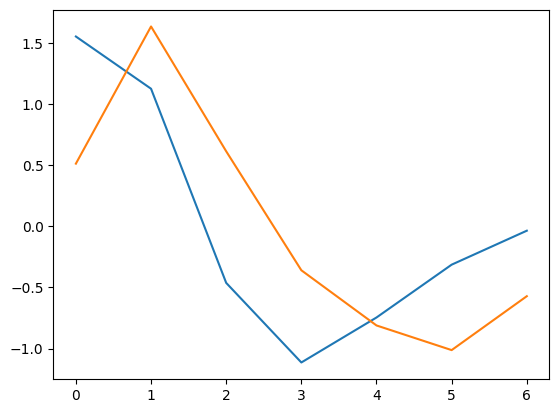

In [24]:
k = 42
plt.plot(pip_miner._cluster_centers[k][:7])
plt.plot(pip_miner._cluster_centers[k][7:])
indexea = [pip_miner._unique_pip_indices[x] for x in pip_miner._pip_clusters[k]]
data.iloc[indexea]

In [19]:
indexea = [pip_miner._unique_pip_indices[x] for x in pip_miner._pip_clusters[21]]
data.iloc[indexea]

,open,close,high,low,vol,amount,datetime,up_count,down_count,code,...,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll96,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480,K,D,J,target_close1,target_close2,target_close5,K_pre,signal
index,,,,,,,,,,,,,,,,,,,,,
2021-11-05 13:45:00,7437.73,7436.14,7438.65,7434.76,34113260.0,3.411329e+09,2021-11-05 13:45:00,0,0,000852,...,NaN,NaN,21.463852,26.284075,11.823407,-0.003500,0.011088,0.033886,19.400983,True
2022-06-21 11:05:00,6769.71,6793.05,6793.93,6769.71,32402932.0,3.240298e+09,2022-06-21 11:05:00,346,626,000852,...,0.921819,0.995004,20.220645,28.466967,3.728001,-0.005882,-0.010205,0.033414,17.710389,True
2022-06-21 14:35:00,6732.46,6757.33,6757.33,6728.78,36842624.0,3.684268e+09,2022-06-21 14:35:00,237,736,000852,...,0.868249,0.994285,20.184479,23.692742,13.167953,-0.007413,0.011519,0.046464,16.213027,True
2022-08-25 14:30:00,6972.38,6986.12,6986.43,6972.38,28595412.0,2.859546e+09,2022-08-25 14:30:00,367,603,000852,...,0.669270,-0.799874,22.696769,28.038684,12.012940,-0.000424,0.003563,-0.038778,18.286001,True
2022-10-31 09:45:00,6246.11,6242.27,6246.11,6221.78,97909232.0,9.790928e+09,2022-10-31 09:45:00,526,442,000852,...,0.921716,0.990299,21.576853,14.261741,36.207077,0.011068,0.038065,0.080434,19.310128,True


In [ ]:
data["target_close2"].diff(48)[50:]

In [ ]:
a=np.array([1,2,3,4])
a==None

In [ ]:
len(arr)

In [ ]:
len(pip_miner._cluster_centers)


In [ ]:
a.any(None)

In [ ]:
if isinstance(data["target_close2"], pd.Series):
    print(123)

In [ ]:
type(data["target_close2"])